In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('t20i_info.csv')

In [3]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.shape

(63888, 9)

In [5]:
df.isnull().sum()

Unnamed: 0             0
match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        63888 non-null  int64  
 1   match_id          63888 non-null  int64  
 2   batting_team      63888 non-null  object 
 3   bowling_team      63888 non-null  object 
 4   ball              63888 non-null  float64
 5   runs              63888 non-null  int64  
 6   player_dismissed  63888 non-null  object 
 7   city              55340 non-null  object 
 8   venue             63888 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.4+ MB


In [7]:
df['city'].value_counts()

city
Colombo          4086
Mirpur           3420
Johannesburg     3331
Auckland         2532
Cape Town        2369
                 ... 
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Melbourne         121
Sylhet            116
Name: count, Length: 81, dtype: int64

In [8]:
#Requirements need to predicted score like Cricbuzz and other cricket sites


# batting team, 
# bowling team, 
# city, 
# current score, 
# balls left, 
# wicket left, 
# current run rate, 
# last five/six->powerplay,

In [9]:
df[df['city'].isnull()]['venue'][0].split(" ")

['Melbourne', 'Cricket', 'Ground']

In [10]:
# Filling null city to venue[0] first name --> 'Melbourne'


df[df['city'].isnull()]['venue'][0].split(" ")[0]

'Melbourne'

In [11]:
df['city'] = df['city'].fillna(df['venue'].apply(lambda x: x.split(' ')[0]))

In [12]:
# df.head(5)
df.sample(5)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
1201,80,15,England,South Africa,12.6,1,0,Cardiff,Sophia Gardens
45106,11,694,Pakistan,Sri Lanka,1.6,4,0,Hambantota,Mahinda Rajapaksa International Cricket Stadiu...
32773,83,554,Afghanistan,India,13.4,1,0,St Lucia,"Beausejour Stadium, Gros Islet"
41863,117,653,India,England,18.6,1,0,Colombo,R Premadasa Stadium
15612,47,232,India,Bangladesh,7.6,0,0,Delhi,Arun Jaitley Stadium


In [13]:
df.isnull().sum()

Unnamed: 0          0
match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [14]:
# plt.figure(figsize=(10, 6))
# sns.pairplot(df) 

In [15]:
# Now we are taking those city where played matches minimum 500 matches

eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 500].index.tolist()

In [16]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad',
 'Brisbane',
 'Birmingham',
 'Hambantota',
 'Dhaka',
 'Lucknow']

In [17]:
df = df[df['city'].isin(eligible_cities)]

In [18]:
df.sample(5)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
32150,65,548,New Zealand,Sri Lanka,10.4,0,0,Colombo,R Premadasa Stadium
11582,52,149,Bangladesh,West Indies,8.2,1,0,Dhaka,"Shere Bangla National Stadium, Mirpur"
42057,58,656,New Zealand,Sri Lanka,9.4,1,0,Pallekele,Pallekele International Cricket Stadium
51899,37,790,South Africa,New Zealand,6.2,1,0,Chittagong,Zahur Ahmed Chowdhury Stadium
41086,7,646,India,Afghanistan,1.1,1,0,Colombo,R Premadasa Stadium


In [19]:
df.shape

(53223, 9)

In [20]:
# Creating current score column
# group by the match_id

df['current_score'] = df.groupby('match_id')['runs'].cumsum()



In [21]:
df.head() 

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3


In [22]:
df['over'] = df['ball'].apply(lambda x: str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x: str(x).split(".")[1])

In [23]:
df.head(10)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5
5,5,2,Australia,Sri Lanka,0.6,3,0,Melbourne,Melbourne Cricket Ground,6,0,6
6,6,2,Australia,Sri Lanka,1.1,0,0,Melbourne,Melbourne Cricket Ground,6,1,1
7,7,2,Australia,Sri Lanka,1.2,1,0,Melbourne,Melbourne Cricket Ground,7,1,2
8,8,2,Australia,Sri Lanka,1.3,0,0,Melbourne,Melbourne Cricket Ground,7,1,3
9,9,2,Australia,Sri Lanka,1.4,0,0,Melbourne,Melbourne Cricket Ground,7,1,4


In [24]:
df['ball_bowled'] = (df['over'].astype(int)*6 + df['ball_no'].astype(int))

In [25]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121


In [26]:
df['balls_left'] = 120 - df['ball_bowled']


In [27]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,-1


In [28]:
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)


In [29]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53223 entries, 0 to 63887
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        53223 non-null  int64  
 1   match_id          53223 non-null  int64  
 2   batting_team      53223 non-null  object 
 3   bowling_team      53223 non-null  object 
 4   ball              53223 non-null  float64
 5   runs              53223 non-null  int64  
 6   player_dismissed  53223 non-null  object 
 7   city              53223 non-null  object 
 8   venue             53223 non-null  object 
 9   current_score     53223 non-null  int64  
 10  over              53223 non-null  object 
 11  ball_no           53223 non-null  object 
 12  ball_bowled       53223 non-null  int32  
 13  balls_left        53223 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 5.9+ MB


In [31]:
# Wicket left

df['player_dismissed'] = df['player_dismissed'].apply(lambda x:1 if x!='0' else '0')




In [32]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,1,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0


In [33]:
df['player_dismissed'] = df['player_dismissed'].astype(int)

In [34]:
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()

In [35]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0


In [36]:
df['wicket_left'] = 10 - df['player_dismissed']

In [37]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1


In [38]:
#  Current Run-Rate

df['current_run_rate'] = (df['current_score']*6) / df['ball_bowled']

In [39]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000


In [40]:
# 5 overs how many run

groups = df.groupby('match_id')

match_id = df['match_id'].unique()
last_five = []
for id in match_id:
    last_five.extend(groups.get_group(id).rolling(window = 30)['runs'].sum().values.tolist())


In [41]:
df['last_five'] = last_five

In [42]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 44.0,
 45.0,
 44.0,
 42.0,
 43.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 38.0,
 39.0,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 42.0,
 42.0,
 44.0,
 44.0,
 40.0,
 39.0,
 37.0,
 35.0,
 31.0,
 27.0,
 26.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 31.0,
 31.0,
 36.0,
 37.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 32.0,
 32.0,
 31.0,
 29.0,
 29.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 36.0,
 37.0,
 37.0,
 39.0,
 41.0,
 40.0,
 41.0,
 41.0,
 42.0,
 44.0,
 39.0,
 43.0,
 45.0,
 48.0,
 48.0,
 48.0,
 49.0,
 49.0,
 49.0,
 51.0,
 51.0,
 51.0,
 52.0,
 52.0,
 53.0,
 53.0,
 53.0,
 54.0,
 53.0,
 52.0,
 50.0,
 53.0,
 47.0,
 46.0,
 45.0,
 46.0,
 47.0,
 49.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [43]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate,last_five
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000,NaN
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000,NaN
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000,NaN
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000,NaN
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256,32.0
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932,32.0
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521,32.0
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000,33.0


In [44]:
final_df = df.groupby('match_id')['runs'].sum().reset_index().merge(df, on = 'match_id')

In [45]:
final_df

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate,last_five
0,2,168,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000,NaN
1,2,168,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000,NaN
2,2,168,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000,NaN
3,2,168,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000,NaN
4,2,168,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53218,964,128,121,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256,32.0
53219,964,128,122,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932,32.0
53220,964,128,123,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521,32.0
53221,964,128,124,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000,33.0


In [46]:
final_df.columns

Index(['match_id', 'runs_x', 'Unnamed: 0', 'batting_team', 'bowling_team',
       'ball', 'runs_y', 'player_dismissed', 'city', 'venue', 'current_score',
       'over', 'ball_no', 'ball_bowled', 'balls_left', 'wicket_left',
       'current_run_rate', 'last_five'],
      dtype='object')

In [47]:
# Used to select multiple columns.
# Returns a DataFrame

final_df = final_df[['batting_team', 'bowling_team', 'city', 'current_score','balls_left',
                     'wicket_left', 'current_run_rate', 'last_five','runs_x']]

In [48]:
# Drop null value

final_df.dropna(inplace = True)

In [49]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_run_rate,last_five,runs_x
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168
...,...,...,...,...,...,...,...,...,...
53218,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
53219,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
53220,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
53221,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


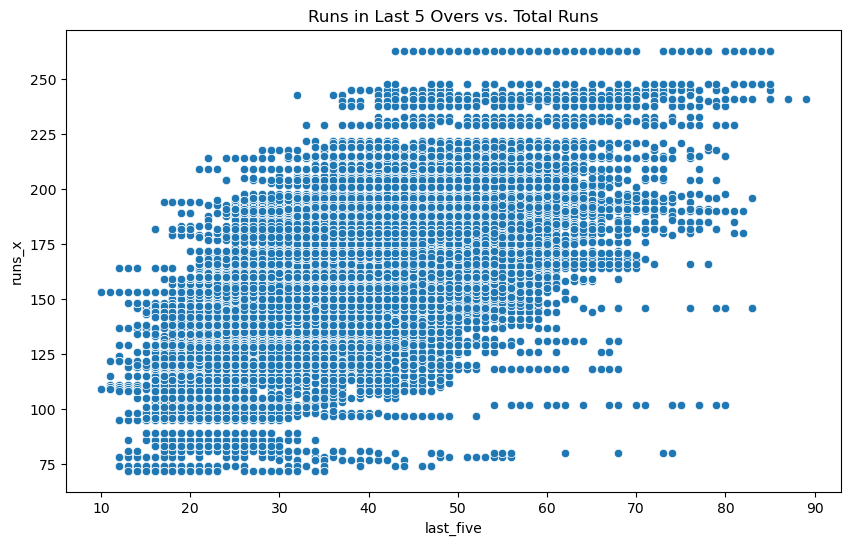

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='last_five', y='runs_x', data=final_df)
plt.title('Runs in Last 5 Overs vs. Total Runs')
plt.show()

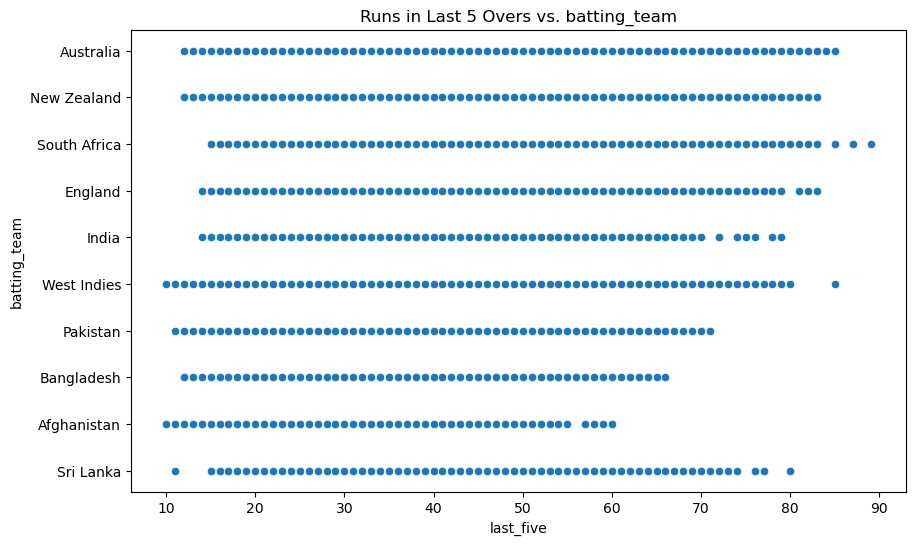

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = final_df['last_five'], y = final_df['batting_team'])
plt.title('Runs in Last 5 Overs vs. batting_team')
plt.show()

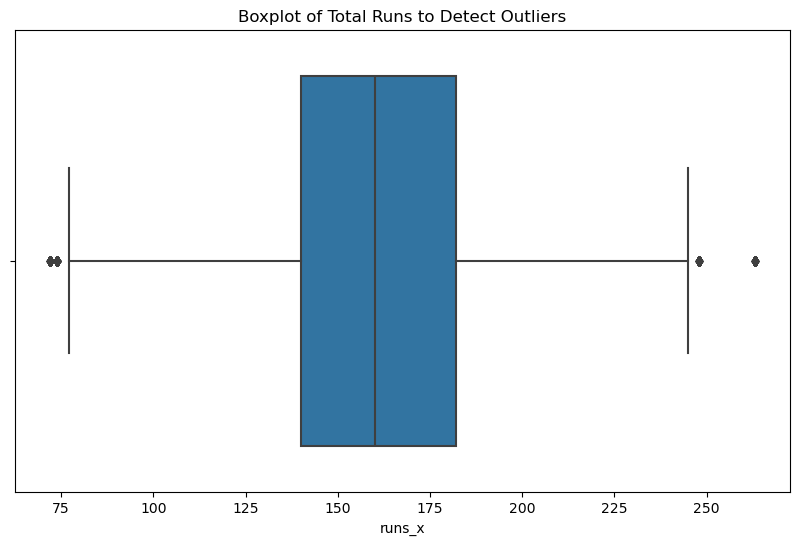

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['runs_x'])
plt.title('Boxplot of Total Runs to Detect Outliers')
plt.show()

In [53]:
# Check again here not a null value

final_df.isnull().sum()

batting_team        0
bowling_team        0
city                0
current_score       0
balls_left          0
wicket_left         0
current_run_rate    0
last_five           0
runs_x              0
dtype: int64

In [54]:
final_df.shape

(40532, 9)

## Spliting


In [55]:
X = final_df.drop(columns = ['runs_x'])
y = final_df['runs_x']


In [56]:
# pip install scikit-learn==1.2

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_run_rate,last_five
6039,Sri Lanka,Bangladesh,Colombo,79,73,9,10.085106,42.0
33749,Pakistan,New Zealand,Pallekele,147,16,6,8.480769,31.0
25013,New Zealand,Sri Lanka,Colombo,54,79,10,7.902439,41.0
32702,Pakistan,England,Dubai,101,27,5,6.516129,28.0
48613,Pakistan,New Zealand,Auckland,105,34,7,7.325581,36.0
...,...,...,...,...,...,...,...,...
8237,Pakistan,England,Cardiff,42,77,8,5.860465,26.0
14822,New Zealand,West Indies,Mount Maunganui,61,75,8,8.133333,46.0
50124,Pakistan,India,Kolkata,38,75,10,5.066667,31.0
1150,West Indies,India,Lauderhill,84,83,10,13.621622,67.0


In [60]:
X_test

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_run_rate,last_five
24679,Bangladesh,West Indies,St Kitts,75,42,3,5.769231,22.0
35666,West Indies,Australia,Colombo,57,77,9,7.953488,43.0
52749,Pakistan,Bangladesh,Mirpur,107,10,4,5.836364,51.0
31358,Sri Lanka,Australia,Pallekele,137,23,7,8.474227,53.0
6308,India,Bangladesh,Colombo,81,52,9,7.147059,27.0
...,...,...,...,...,...,...,...,...
28205,New Zealand,Australia,Christchurch,62,81,8,9.538462,42.0
17066,West Indies,Bangladesh,Johannesburg,33,83,9,5.351351,22.0
39863,England,Australia,Melbourne,89,43,4,6.935065,30.0
426,New Zealand,Bangladesh,Mount Maunganui,49,68,7,5.653846,25.0


## Evaluation

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [62]:
transformer = ColumnTransformer([
    ('transformer', OneHotEncoder( drop = 'first', sparse_output=False),['batting_team', 'bowling_team', 'city'])
    ], remainder='passthrough')

In [63]:
pipe = Pipeline(steps=[
    ('step1', transformer),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate = 0.2, max_depth = 12, random_state=1))
])

In [64]:
# pip install --upgrade scikit-learn xgboost

In [65]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.9890010356903076

In [67]:
mean_absolute_error(y_test, y_pred)

1.5826313495635986

## Exporting the Model

In [68]:
# import pickle

# pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [69]:
 import pickle

with open('pipe.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)